# Covariance and Correlation in Machine Learning

Understanding how variables move together is essential for feature engineering,
dimensionality reduction, and building stable machine learning models.

---

## A. Covariance

### What Covariance Tells Us
Covariance measures **how two random variables vary together**.

- **Positive covariance** → variables increase or decrease together  
- **Negative covariance** → one increases while the other decreases  
- **Zero covariance** → no linear relationship  

### Mathematical Definition
For two variables \(X\) and \(Y\):

$$ \text{Cov}(X, Y) = \mathbb{E}[(X - \mu_X)(Y - \mu_Y)] $$

Where:
- $\mu_X, \mu_Y$ are the means of $X$ and $Y$

### Key Properties
- Can be any real value (positive, negative, zero)
- Depends on the **scale** of variables
- Units are the product of the units of \(X\) and \(Y\)

### ML Intuition
- Large covariance means features carry **overlapping information**
- Covariance is the mathematical foundation of **Principal Component Analysis (PCA)**
- Not directly comparable across features with different units

---

## Covariance Matrix

For a dataset with multiple features, covariance is summarized using a **covariance matrix**.

$$
\Sigma =
\begin{bmatrix}
\text{Var}(X_1) & \text{Cov}(X_1,X_2) & \dots \\
\text{Cov}(X_2,X_1) & \text{Var}(X_2) & \dots \\
\vdots & \vdots & \ddots
\end{bmatrix}
$$

### Why It Matters in ML
- PCA finds directions (eigenvectors) of maximum variance from this matrix
- Gaussian models assume data is structured by a covariance matrix
- Encodes redundancy among features

---

## B. Correlation

### What Correlation Tells Us
Correlation measures the **strength and direction of a linear relationship** between variables.

It is a **scaled version of covariance**, making it unit-free.

---

### Pearson Correlation Coefficient

$$
\rho_{X,Y} = \frac{\text{Cov}(X,Y)}{\sigma_X \sigma_Y}
$$

Where:
- $\sigma_X, \sigma_Y$ are standard deviations

### Key Properties
- Bounded between **-1 and +1**
- \(+1\): perfect positive linear relationship  
- \(-1\): perfect negative linear relationship  
- \(0\): no linear relationship  

### ML Intuition
- High absolute correlation indicates **redundant features**
- Helps detect multicollinearity
- Common first step in exploratory data analysis

---

## Covariance vs Correlation

| Aspect | Covariance | Correlation |
|------|------------|-------------|
| Scale dependent | Yes | No |
| Range | Unbounded | [-1, 1] |
| Interpretability | Low | High |
| Used in PCA | Yes | Indirectly |

---

## Real ML Implications

### 1. Feature Engineering
- Highly correlated features add little new information
- Removing one reduces model complexity

### 2. Multicollinearity
- Linear models struggle with correlated predictors
- Coefficients become unstable and unreliable

### 3. Dimensionality Reduction
- PCA removes correlation by transforming features
- Results in orthogonal (uncorrelated) components

### 4. Dataset Understanding
- Correlation matrices reveal structure and relationships
- Guide model and preprocessing choices

---

## pandas-Based Practice

Common exploratory commands:

```python
df.corr()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
n = 1000

# Base feature
X1 = np.random.normal(0,1,n)

# Strong positive correlation with X1
X2 = 2*X1 + np.random.normal(0,0.3,n)

# Strong negative correlation with X1
X3 = -1.5*X1 + np.random.normal(0,0.3,n)

# Independent feature
X4 = np.random.normal(0,1,n)

df = pd.DataFrame({
    "Feature_1":X1,
    "Feature_2":X2,
    "Feature_3":X3,
    "Feature_4":X4
})

df

,Feature_1,Feature_2,Feature_3,Feature_4
0,0.496714,1.413235,-0.947625,-1.907808
1,-0.138264,0.000862,0.164041,-0.860385
2,0.647689,1.313266,-1.209259,-0.413606
3,1.523030,2.851979,-2.376933,1.887688
4,-0.234153,-0.258840,-0.216854,0.556553
...,...,...,...,...
995,-0.281100,-0.241156,0.444895,0.028458
996,1.797687,3.587417,-2.619204,-2.077812
997,0.640843,1.017123,-1.333792,-0.320298
998,-0.571179,-1.191278,0.957021,1.643378


 ### 2. Covariance Matrix (core idea behind PCA)

In [2]:
cov_matrix = df.cov()
print(cov_matrix)

           Feature_1  Feature_2  Feature_3  Feature_4
Feature_1   0.958864   1.905890  -1.431903  -0.013398
Feature_2   1.905890   3.877646  -2.847037  -0.043608
Feature_3  -1.431903  -2.847037   2.225311   0.026639
Feature_4  -0.013398  -0.043608   0.026639   1.055001


#### ML intuition
* Covariance shows joint variability
* Large magnitude → features move together
* PCA finds directions of maximum covariance

#### Important limitation:
* Covariance depends on scale
* Cannot compare features with different units

### 3. Correlation Matrix (scaled covariance)

In [5]:
corr_matrix = df.corr()
corr_matrix

,Feature_1,Feature_2,Feature_3,Feature_4
Feature_1,1.000000,0.988406,-0.980256,-0.013321
Feature_2,0.988406,1.000000,-0.969201,-0.021560
Feature_3,-0.980256,-0.969201,1.000000,0.017386
Feature_4,-0.013321,-0.021560,0.017386,1.000000


#### ML intuition
* Scale-free version of covariance
* Values between -1 and +1
* Strong correlations indicate redundancy

### 4. Visualizing correlation (what ML practitioners actually do)

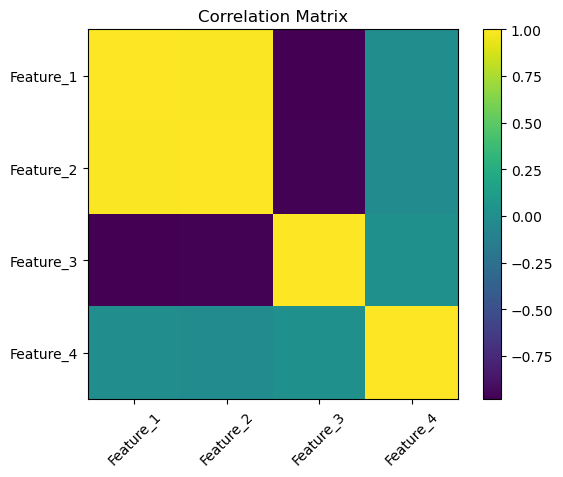

In [7]:
plt.imshow(corr_matrix,interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation = 45)
plt.yticks(range(len(df.columns)),df.columns)
plt.title("Correlation Matrix")
plt.show()

#### Interpretation:
* Bright positive → redundant features
* Dark negative → inverse relationship
* Near zero → independent information

### 5. Multicollinearity problem (linear models)

Highly correlated features cause unstable coefficients in:
* Linear regression
* Logistic regression

Demonstration using regression

In [9]:
from sklearn.linear_model import LinearRegression
X = df[["Feature_1","Feature_2","Feature_3","Feature_4",]]
y = 3*X1 + np.random.normal(0,0.5,n)

model = LinearRegression()
model.fit(X,y)

for name, coef in zip(X.columns,model.coef_):
    print(f"{name}:{coef:.3f}")

Feature_1:2.924
Feature_2:0.041
Feature_3:0.005
Feature_4:0.018


#### ML insight:
* Coefficients become unreliable
* Model struggles to assign importance when features are correlated

### 6. Variance Inflation Factor (advanced multicollinearity check)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i)
                  for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,Feature_1,67.356259
1,Feature_2,43.334101
2,Feature_3,25.599018
3,Feature_4,1.003835


#### Rule of thumb:
* VIF > 5 → problematic
* VIF > 10 → severe multicollinearity

### 7. Covariance → PCA (key ML connection)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize first (important!)
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:",pca.explained_variance_ratio_)

Explained variance ratio: [0.7397652  0.24989259]


#### Why this works
* PCA diagonalizes the covariance matrix
* Converts correlated features into uncorrelated components
* Reduces dimensionality while preserving information

### 8. PCA projection visualization

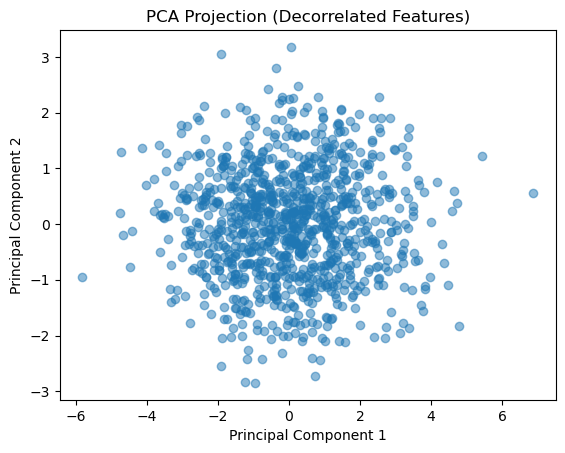

In [17]:
plt.scatter(X_pca[:,0],X_pca[:,1],alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (Decorrelated Features)")
plt.show()

##### ML takeaway:
* Correlated features collapse into fewer dimensions
* Improves training stability and generalization

### 9. Real ML workflow summary
|Concept|	Why it matters|
|------|-----|
|Covariance|	Core of PCA and Gaussian models|
|Correlation|	Feature redundancy detection|
|Multicollinearity|	Breaks linear models|
|PCA	| Fixes correlation by design|
|df.corr()	| First diagnostic step|


##### Final ML intuition
* Covariance tells you how features vary together
* Correlation tells you how strongly they are linearly related
* High correlation ≠ more information
* PCA exists because correlated features are inefficient